In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "AAPL"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565697,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873642,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875893,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210688,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140905,237458000
...,...,...,...,...,...,...
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.500000,55962800
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.770004,45326900
2023-05-10,173.020004,174.029999,171.899994,173.559998,173.559998,53724500


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2105 entries, 2015-01-02 to 2023-05-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2105 non-null   float64
 1   High       2105 non-null   float64
 2   Low        2105 non-null   float64
 3   Close      2105 non-null   float64
 4   Adj Close  2105 non-null   float64
 5   Volume     2105 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 115.1 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565697,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873642,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875893,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210688,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140905,237458000


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.500000,55962800
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.770004,45326900
2023-05-10,173.020004,174.029999,171.899994,173.559998,173.559998,53724500
2023-05-11,173.850006,174.589996,172.169998,173.750000,173.750000,49455600
2023-05-12,173.619995,174.059998,172.330002,172.532700,172.532700,15253132


In [7]:
data.shape

(2105, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2.105000e+03
mean,76.464478,77.343184,75.634939,76.528600,74.848464,1.288413e+08
std,50.653177,51.318690,50.031903,50.707659,51.238513,6.791438e+07
min,22.500000,22.917500,22.367500,22.584999,20.883030,1.525313e+07
25%,33.077499,33.242500,32.779999,33.029999,30.153851,8.347720e+07
50%,50.212502,50.845001,49.822498,50.387501,48.922798,1.097056e+08
75%,129.800003,131.050003,128.429993,130.029999,129.127258,1.534356e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,6.488252e+08


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

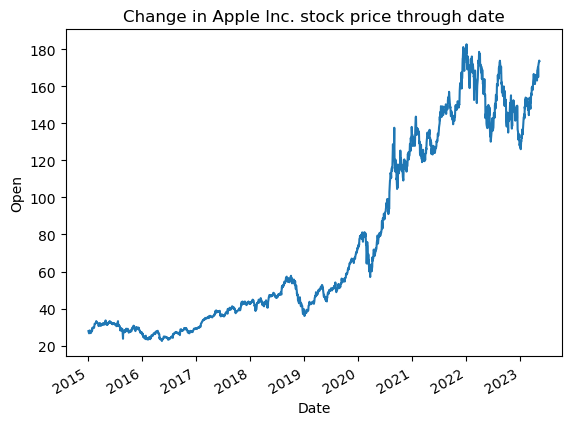

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in Apple lnc. stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((1578, 3), (527, 3))

In [15]:
y_train.shape,y_test.shape

((1578,), (527,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[114.54184952  42.21639992  27.33412464 141.4410994   43.77854961
  28.35355007  31.84360014  30.31129974  25.72909983 142.53530106
 115.47249954  30.07039986 114.81385056  26.60645018 140.33149979
 143.23299805  29.67612471 126.20182465  29.90292501  29.53132523
 157.4582988   46.9408749   30.60392471  26.90087505  28.71947462
  25.39445051 144.51400009  52.20377426 135.05949966  31.81330023
  38.64879963 161.66750305  25.72592508 137.72279892  45.3828001
 148.10269699  30.40320011  54.67592518  24.70467522  85.2691983
  74.42945053  36.48875015 174.27948807  39.47107544 165.21460281
 161.50850082 150.39819992  46.76790005 132.08979889  34.77944992
 115.41155029 174.32808044  31.29087502  28.85557501  39.11437542
  25.22557472  23.91620007  28.88187498  36.24279984 155.68709946
 109.89002312  41.50245087  80.49392464 139.84550156 148.4692981
  52.1936742   66.88937668  65.6871994   28.87329985 120.56149857
  50.60880024  26.02962477  34.1563755  145.29089966  38.55690044
  39.17040016

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9996768162190948


In [22]:
y_test=list(y_test)

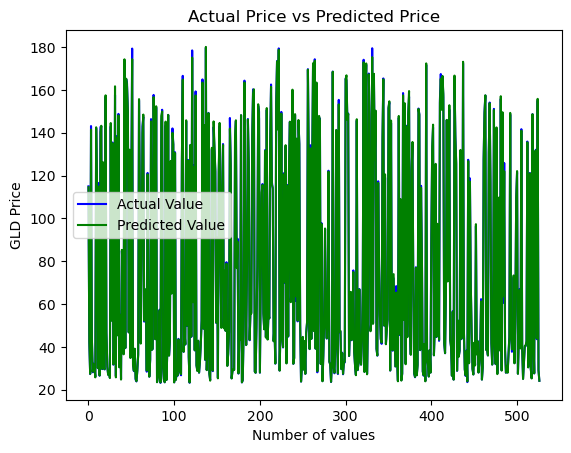

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

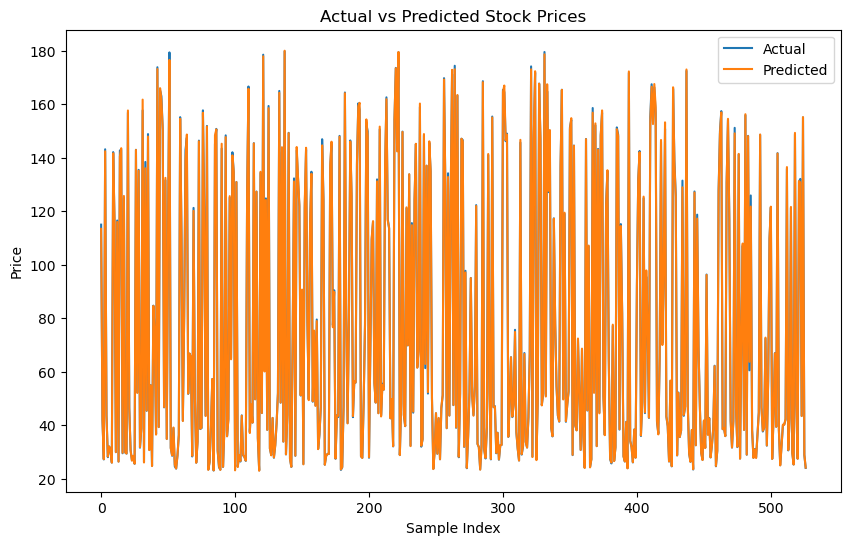

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([ 27.04393089,  26.5695096 ,  26.44126459, ..., 172.92271062,
       173.0694511 , 172.89703113])

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value23
enter a value23
enter a value23
23.013694722494936


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("AAPL_model.pkl",'wb')
pickle.dump(model,file)